In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_company = pd.read_excel('Company.xlsx')

In [3]:
df_company.head(10)

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
5,153,140,154,199,NaN
6,34,28,78,22,Quality A
7,191,144,143,154,NaN
8,160,181,194,178,Quality B
9,145,178,158,141,NaN


In [4]:
df_company.shape

(61, 5)

In [5]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


We can see that there are 18 data missing 

In [6]:
df_company.describe()

,A,B,C,D
count,61.000000,61.000000,61.000000,61.000000
mean,118.557377,116.639344,114.081967,114.459016
std,61.771494,57.897908,65.615368,63.144431
min,3.000000,5.000000,3.000000,3.000000
25%,61.000000,63.000000,59.000000,51.000000
50%,136.000000,138.000000,135.000000,132.000000
75%,171.000000,168.000000,174.000000,174.000000
max,200.000000,200.000000,200.000000,199.000000


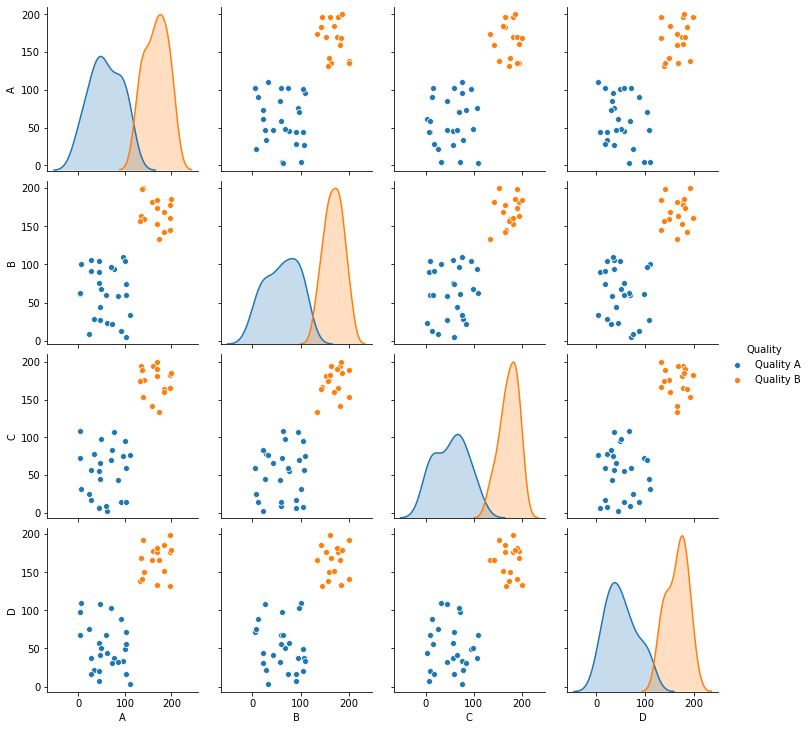

In [7]:
sns.pairplot(df_company, hue = 'Quality', diag_kind='kde')

We can see that the Quality A and B are easy seperable

In [8]:
df_company_copy = df_company.copy(deep=True)

In [9]:
df_company=df_company.drop('Quality', axis=1)

In [10]:
cluster_range = range( 1, 10)
cluster_errors = []
for num_clusters in cluster_range:
  kmeans = KMeans( num_clusters, n_init = 10)
  kmeans.fit(df_company)
  cluster_errors.append(kmeans.inertia_ )

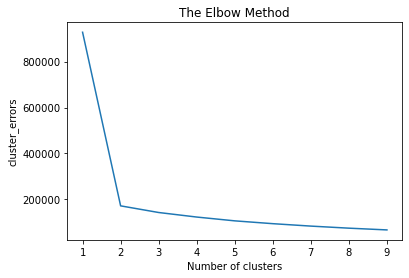

In [11]:
plt.plot(range(1,10),cluster_errors)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('cluster_errors')
plt.show()

As seen from the elbow method the K value is 2 

In [12]:
kmeans = KMeans( n_clusters = 2, random_state = 7 )
kmeans.fit(df_company)

prediction=kmeans.predict(df_company)
df_company["GROUP"] = prediction

In [13]:
df_company.head(10)

,A,B,C,D,GROUP
0,47,27,45,108,1
1,174,133,134,166,0
2,159,163,135,131,0
3,61,23,3,44,1
4,59,60,9,68,1
5,153,140,154,199,0
6,34,28,78,22,1
7,191,144,143,154,0
8,160,181,194,178,0
9,145,178,158,141,0


In [14]:
for i in range(0,61):
    if(df_company_copy.iloc[i,4] != 'Quality A' and df_company_copy.iloc[i,4] != 'Quality B'):
        if (df_company.iloc[i,4] == 1):
            df_company.iloc[i,4] = 'Quality A'
        elif (df_company.iloc[i,4] == 0):
            df_company.iloc[i,4] = 'Quality B'
        df_company_copy.iloc[i,4] = df_company.iloc[i,4]    

In [15]:
df_company_copy.head(10)

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,Quality B
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
5,153,140,154,199,Quality B
6,34,28,78,22,Quality A
7,191,144,143,154,Quality B
8,160,181,194,178,Quality B
9,145,178,158,141,Quality B


The Data was less but the attributes present was of stronger attributes thus making it easy to segregate the two Quality 